### Importing Librabries, Loading Data

In [2]:
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, re, time, math, tqdm, itertools
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
import keras
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.callbacks import CSVLogger, ModelCheckpoint
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report, mean_absolute_error


In [3]:
os.chdir("D:\\Documents\\Machine_Learning\\Data\\archive\\Resampled")

In [6]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

d:\program files\python3.9.6\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,80,81,83) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Resample all the data
i = 1
for f in all_filenames:
    resampled_csv = pd.read_csv(f).sample(frac=0.3, replace=True, random_state=1)
    #export to csv
    resampled_csv.to_csv( "resample_data{}.csv".format(i), index=False, encoding='utf-8-sig')
    print(i)
    i += 1

In [ ]:
#concatenate

#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])

#export to csv
combined_csv.to_csv("data.csv", index=False, encoding='utf-8-sig')

In [4]:
data = pd.read_csv("data.csv")

### Exploratory Data Analysis

In [4]:
data.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Flow ID,Src IP,Src Port,Dst IP
0,21.0,6.0,14/02/2018 10:57:10,2.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000,0.0,0.0,FTP-BruteForce,NaN,NaN,NaN,NaN
1,80.0,6.0,14/02/2018 12:20:06,115581409.0,16.0,14.0,447.0,788.0,436.0,0.0,...,11285.0,9.999054e+06,16233.856328,10004081.0,9950110.0,Benign,NaN,NaN,NaN,NaN
2,51530.0,6.0,14/02/2018 01:09:10,181.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000,0.0,0.0,Benign,NaN,NaN,NaN,NaN
3,53.0,17.0,14/02/2018 12:23:43,471.0,1.0,1.0,42.0,58.0,42.0,42.0,...,0.0,0.000000e+00,0.000000,0.0,0.0,Benign,NaN,NaN,NaN,NaN
4,22.0,6.0,14/02/2018 02:27:15,377977.0,22.0,22.0,2008.0,2665.0,640.0,0.0,...,0.0,0.000000e+00,0.000000,0.0,0.0,SSH-Bruteforce,NaN,NaN,NaN,NaN


In [5]:
data.shape

(4869897, 84)

In [6]:
data.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [40]:
data['Label'].value_counts()

Benign                      4044937
DDOS attack-HOIC             206083
DDoS attacks-LOIC-HTTP       172865
DoS attacks-Hulk             138640
Bot                           85874
FTP-BruteForce                57998
SSH-Bruteforce                56418
Infilteration                 48474
DoS attacks-SlowHTTPTest      42056
DoS attacks-GoldenEye         12345
DoS attacks-Slowloris          3380
DDOS attack-LOIC-UDP            532
Brute Force -Web                195
Brute Force -XSS                 48
SQL Injection                    34
Label                            18
Name: Label, dtype: int64

### Data Visualization

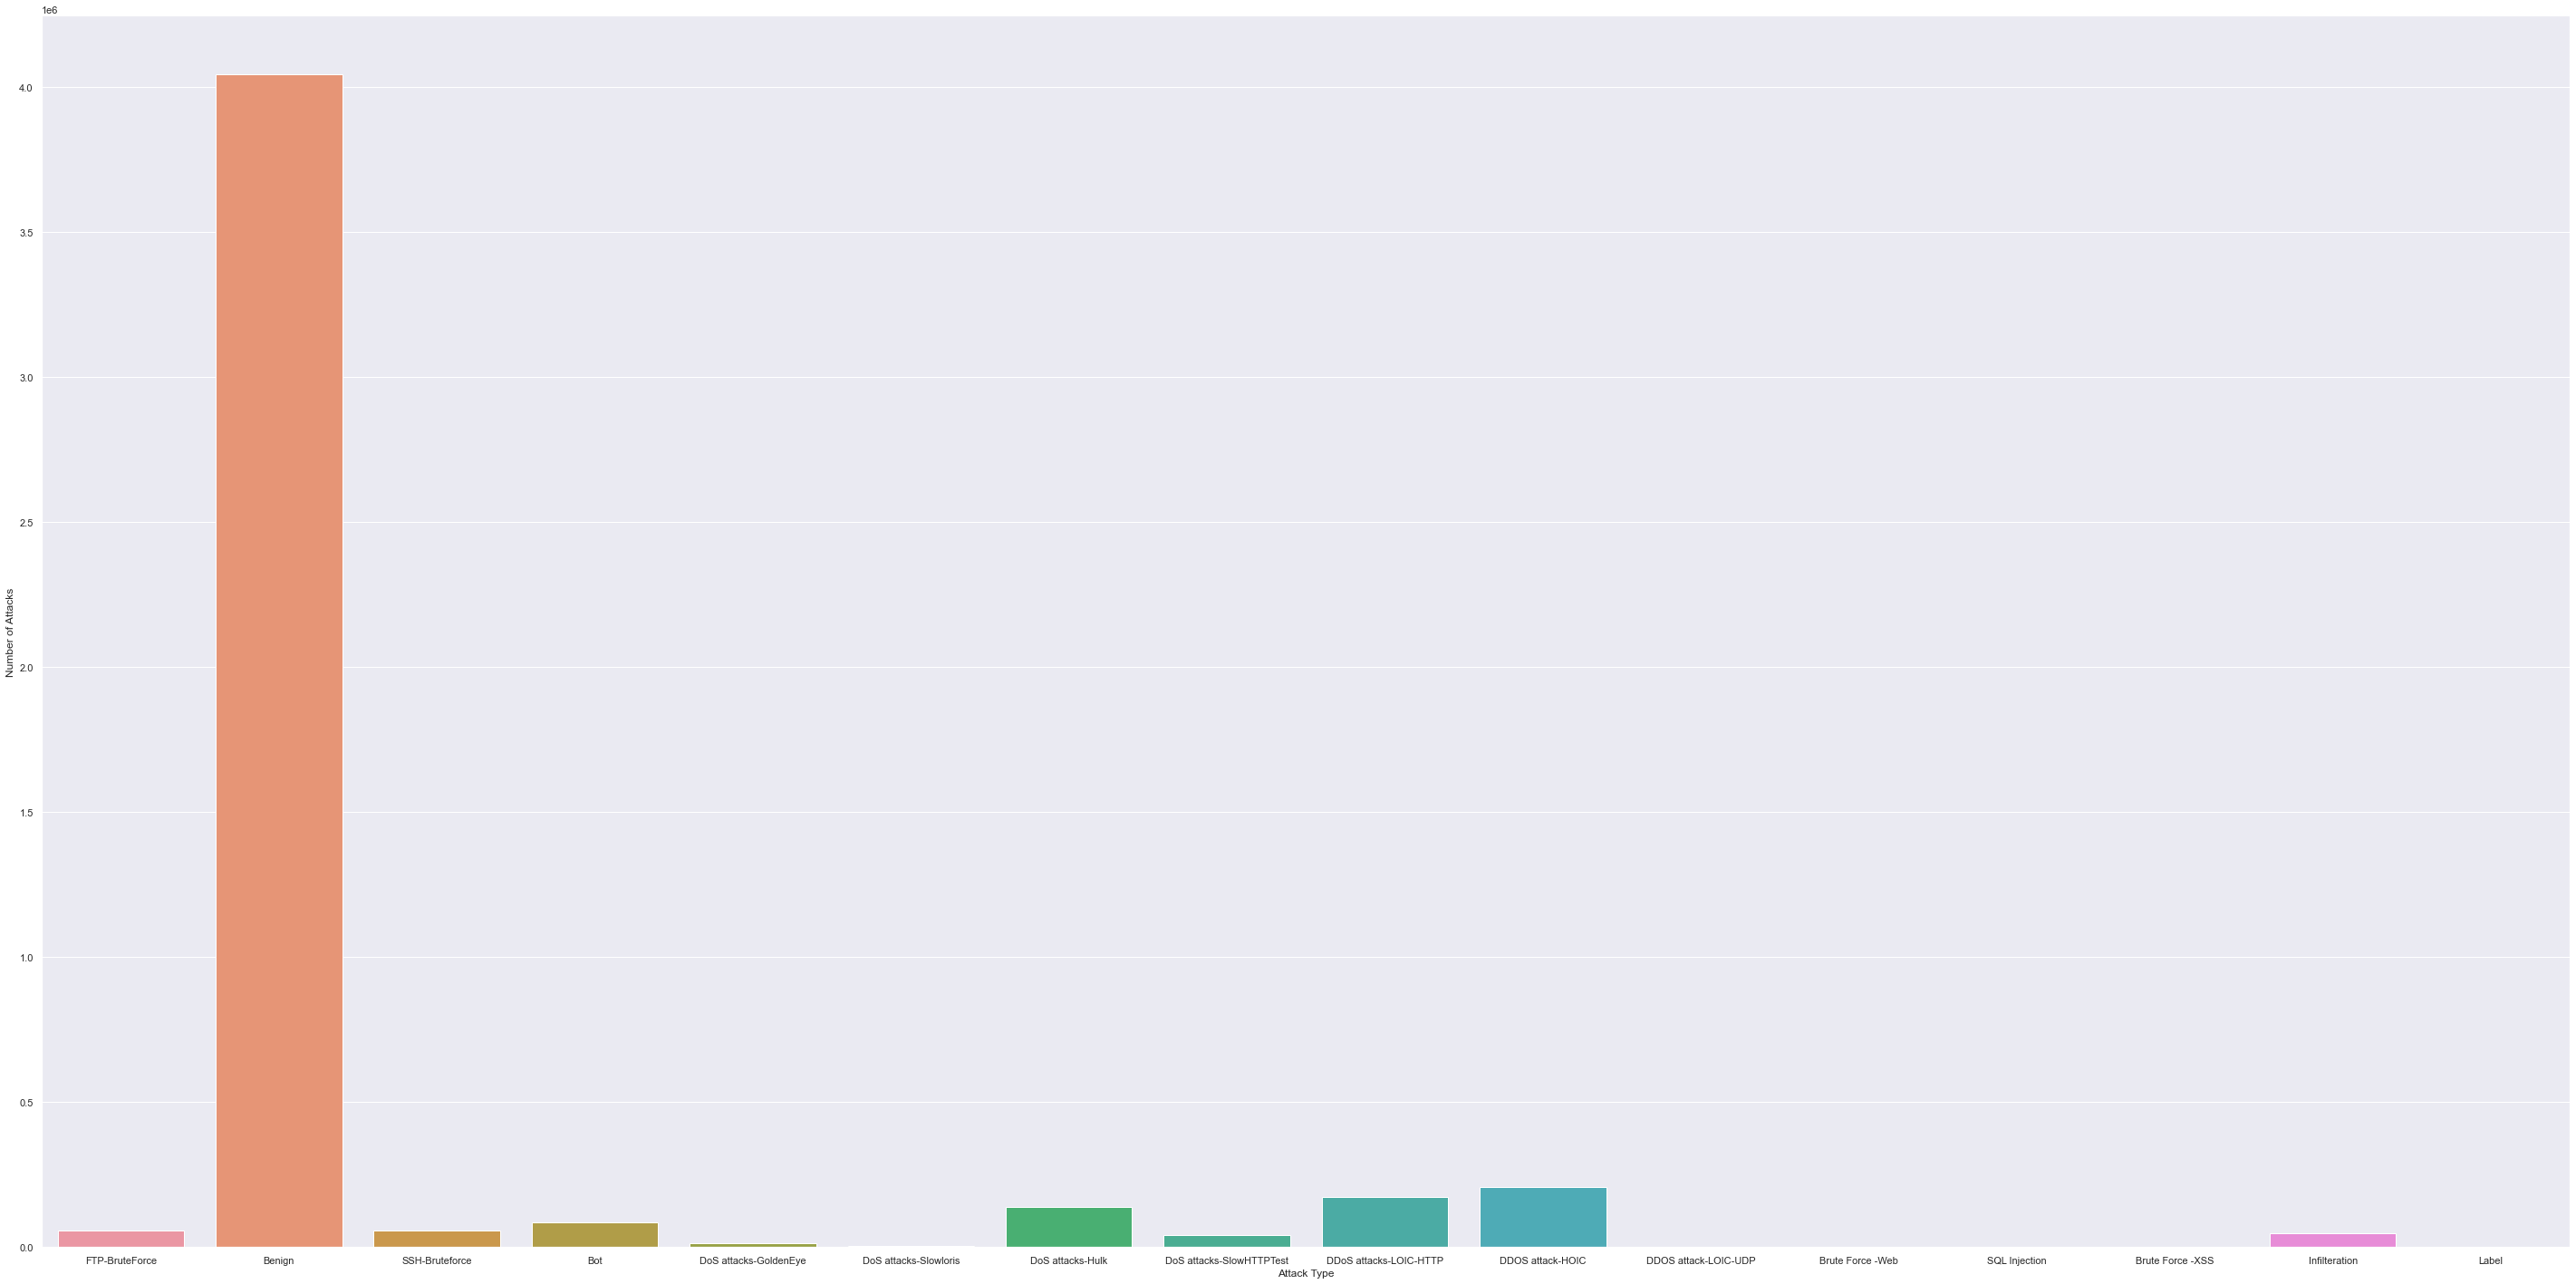

In [41]:
sns.set(rc={'figure.figsize':(50,25)})
ax = sns.countplot(x='Label', data=data)
ax.set(xlabel='Attack Type', ylabel='Number of Attacks')
plt.show()

### Data Cleaning

#### Handling Missing Values

In [42]:
data.isna().sum().to_numpy()

array([     18,      18,       0,      18,      18,      18,      18,
            18,      18,      18,      18,      18,      18,      18,
            18,      18,   17789,      18,      18,      18,      18,
            18,      18,      18,      18,      18,      18,      18,
            18,      18,      18,      18,      18,      18,      18,
            18,      18,      18,      18,      18,      18,      18,
            18,      18,      18,      18,      18,      18,      18,
            18,      18,      18,      18,      18,      18,      18,
            18,      18,      18,      18,      18,      18,      18,
            18,      18,      18,      18,      18,      18,      18,
            18,      18,      18,      18,      18,      18,      18,
            18,      18,       0, 4869897, 4869897, 2485273, 4869897],
      dtype=int64)

In [5]:
missing_value_cols = [col for col in data.columns if data[col].isna().sum()>18]
missing_value_cols

['Flow Byts/s', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP']

In [6]:
cleaned_data = data.drop(columns=missing_value_cols)

In [7]:
cleaned_data.shape
# cleaned_data.columns

(4869897, 79)

In [7]:
cleaned_data = cleaned_data.dropna(axis=0)
cleaned_data.isna().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

#### Label Encoding

In [8]:
le = LabelEncoder()
cleaned_data['Label'] = le.fit_transform(cleaned_data['Label'] )
cleaned_data['Label'].unique()

array([11,  0, 14,  1,  7, 10,  8,  9,  6,  4,  5,  2, 13,  3, 12])

In [9]:
cleaned_data['Label'].value_counts()

0     4044937
4      206083
6      172865
8      138640
1       85874
11      57998
14      56418
12      48474
9       42056
7       12345
10       3380
5         532
2         195
3          48
13         34
Name: Label, dtype: int64

### Random Forest

#### Setting up

In [14]:
y = cleaned_data['Label']
y = y.astype('int')
X = cleaned_data.loc[:, ~cleaned_data.columns.isin(['Label'])]

In [14]:
X.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std',
       'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean',
       'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
       'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
       'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s',
       'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std',
       'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt',
       'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count',
       'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg',
 

In [15]:
X_reduced = X.drop(columns=["Timestamp", "Protocol","PSH Flag Cnt","Init Fwd Win Byts",'Flow Pkts/s'], axis=1)

In [16]:
X_reduced.head()

,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,21.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,40.0,0.000000,0.0000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0
1,80.0,115581409.0,16.0,14.0,447.0,788.0,436.0,0.0,27.937500,108.817565,...,12.0,20.0,19681.090909,27471.5804,102509.0,11285.0,9.999054e+06,16233.856328,10004081.0,9950110.0
2,51530.0,181.0,2.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,20.0,0.000000,0.0000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0
3,53.0,471.0,1.0,1.0,42.0,58.0,42.0,42.0,42.000000,0.000000,...,0.0,8.0,0.000000,0.0000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0
4,22.0,377977.0,22.0,22.0,2008.0,2665.0,640.0,0.0,91.272727,138.182137,...,16.0,32.0,0.000000,0.0000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0


#### Data Spliting

In [17]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, train_size=0.8, test_size=0.2, random_state=1)

#### Fitting Model, Performance Test

In [25]:
# Fit model with RandomForest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
print(rf_model.score(X_test,y_test))

0.981293250374751


In [27]:
y_pred = rf_model.predict(X_test)
confusion_matrix(y_pred,y_test)

array([[804715,     13,     16,      4,    407,      0,    138,      0,
             1,      0,      4,      0,   7600,      0,      1,      1],
       [    12,  17048,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0],
       [     0,      0,     23,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0],
       [     0,      0,      0,      4,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0],
       [  2001,      0,      0,      0,  40863,      0,     36,      0,
             0,      0,      0,      0,      3,      0,      0,      0],
       [     0,      0,      0,      0,      0,    104,     16,      0,
             0,      0,      0,      0,      0,      0,      0,      0],
       [   161,      0,      0,      0,     22,      7,  34144,      0,
             0,      0,      0,      0,      0,      0,   

In [29]:
rf_acc= accuracy_score(y_pred,y_test)
rf_acc

0.981293250374751

In [32]:
# check if the model is overfitting
mae = mean_absolute_error(y_pred,y_test)
mae

0.14574118565062938

In [31]:
rf_f1 = f1_score(y_pred,y_test,average="macro")
rf_f1

0.8596702445743973

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    809234
           1       1.00      1.00      1.00     17061
           2       1.00      0.59      0.74        39
           3       1.00      0.50      0.67         8
           4       0.95      0.99      0.97     41293
           5       0.87      0.94      0.90       111
           6       0.99      0.99      0.99     34334
           7       1.00      1.00      1.00      2514
           8       1.00      1.00      1.00     27788
           9       0.77      0.50      0.60      8298
          10       1.00      0.99      1.00       712
          11       0.71      0.89      0.79     11672
          12       0.47      0.22      0.30      9688
          13       1.00      1.00      1.00         4
          14       1.00      0.67      0.80         3
          15       1.00      1.00      1.00     11221

    accuracy                           0.98    973980
   macro avg       0.92   

### CNN

#### Data Shaping for CNN

In [14]:
cleaned_data['Label'].value_counts()

0     4044937
4      206083
6      172865
8      138640
1       85874
11      57998
14      56418
12      48474
9       42056
7       12345
10       3380
5         532
2         195
3          48
13         34
Name: Label, dtype: int64

In [15]:
lst = [0,4,6,8,1,11,14,12,9,7,10,5,2,3,13]

In [32]:
from sklearn.utils import resample
cnn_data = pd.DataFrame()
for i in lst:
    cnn_data =pd.concat([cnn_data,resample(cleaned_data[cleaned_data['Label']==i], n_samples=40000,random_state=1,replace=True)])
    print(i)
cnn_data


0
4
6
8
1
11
14
12
9
7
10
5
2
3
13


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
201322,3389.0,6.0,14/02/2018 03:31:58,4070492.0,14.0,9.0,1460.0,1731.0,741.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
695303,51759.0,6.0,15/02/2018 01:16:46,27.0,1.0,1.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3098030,80.0,6.0,20/02/2018 02:31:40,5886701.0,4.0,4.0,97.0,231.0,97.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4729818,53.0,17.0,28/02/2018 12:21:41,982.0,1.0,1.0,51.0,112.0,51.0,51.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
694784,53.0,17.0,15/02/2018 12:54:31,283.0,1.0,1.0,37.0,69.0,37.0,37.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4352688,80.0,6.0,23/02/2018 03:08:00,5011734.0,4.0,4.0,566.0,1866.0,566.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13
4157768,80.0,6.0,22/02/2018 04:20:08,44.0,2.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13
4034948,80.0,6.0,22/02/2018 04:19:27,5011504.0,4.0,4.0,586.0,1890.0,586.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13
3980522,80.0,6.0,22/02/2018 04:27:51,5011797.0,5.0,3.0,704.0,2033.0,704.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13


In [33]:
cnn_data.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std',
       'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean',
       'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
       'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
       'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s',
       'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std',
       'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt',
       'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count',
       'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg',
 

In [34]:
cnn_data['Label'].value_counts()

0     40000
4     40000
6     40000
8     40000
1     40000
11    40000
14    40000
12    40000
9     40000
7     40000
10    40000
5     40000
2     40000
3     40000
13    40000
Name: Label, dtype: int64

In [35]:
labels_dict = data['Label'].value_counts().to_dict()
labels_dict

{'Benign': 4044937,
 'DDOS attack-HOIC': 206083,
 'DDoS attacks-LOIC-HTTP': 172865,
 'DoS attacks-Hulk': 138640,
 'Bot': 85874,
 'FTP-BruteForce': 57998,
 'SSH-Bruteforce': 56418,
 'Infilteration': 48474,
 'DoS attacks-SlowHTTPTest': 42056,
 'DoS attacks-GoldenEye': 12345,
 'DoS attacks-Slowloris': 3380,
 'DDOS attack-LOIC-UDP': 532,
 'Brute Force -Web': 195,
 'Brute Force -XSS': 48,
 'SQL Injection': 34,
 'Label': 18}

In [36]:
labels_list = [label for label in labels_dict.keys() if label!='Label']
labels_list

['Benign',
 'DDOS attack-HOIC',
 'DDoS attacks-LOIC-HTTP',
 'DoS attacks-Hulk',
 'Bot',
 'FTP-BruteForce',
 'SSH-Bruteforce',
 'Infilteration',
 'DoS attacks-SlowHTTPTest',
 'DoS attacks-GoldenEye',
 'DoS attacks-Slowloris',
 'DDOS attack-LOIC-UDP',
 'Brute Force -Web',
 'Brute Force -XSS',
 'SQL Injection']

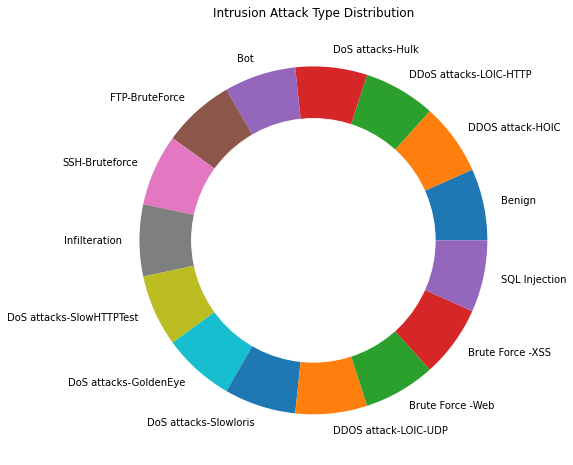

In [37]:
# viewing the distribution of intrusion attacks in our dataset 
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.title('Intrusion Attack Type Distribution')
plt.pie(cnn_data['Label'].value_counts(), labels=labels_list)
p = plt.gcf()
p.gca().add_artist(circle)

#### Making X & Y, Data Splicing

In [38]:
cleaned_cnn_data = cnn_data.drop(columns=["Timestamp", "Protocol","PSH Flag Cnt","Init Fwd Win Byts",'Flow Pkts/s'], axis=1)
cleaned_cnn_data

,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
201322,3389.0,4070492.0,14.0,9.0,1460.0,1731.0,741.0,0.0,104.285714,195.090681,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
695303,51759.0,27.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3098030,80.0,5886701.0,4.0,4.0,97.0,231.0,97.0,0.0,24.250000,48.500000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4729818,53.0,982.0,1.0,1.0,51.0,112.0,51.0,51.0,51.000000,0.000000,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
694784,53.0,283.0,1.0,1.0,37.0,69.0,37.0,37.0,37.000000,0.000000,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4352688,80.0,5011734.0,4.0,4.0,566.0,1866.0,566.0,0.0,141.500000,283.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13
4157768,80.0,44.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13
4034948,80.0,5011504.0,4.0,4.0,586.0,1890.0,586.0,0.0,146.500000,293.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13
3980522,80.0,5011797.0,5.0,3.0,704.0,2033.0,704.0,0.0,140.800000,314.838371,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13


In [39]:
test_cnn = cleaned_cnn_data.sample(frac=0.2)
target_train = cleaned_cnn_data['Label']
target_test = test_cnn['Label']

In [40]:
X_train_cnn = cleaned_cnn_data.loc[:, ~cleaned_cnn_data.columns.isin(['Label'])]
X_test_cnn = test_cnn.loc[:, ~test_cnn.columns.isin(['Label'])]

In [41]:
y_train_cnn = to_categorical(target_train, num_classes=15)
y_test_cnn = to_categorical(target_test, num_classes=15)

In [42]:
X_train_cnn = X_train_cnn.iloc[:, :-1].values
X_test_cnn = X_test_cnn.iloc[:, :-1].values
X_test_cnn

array([[8.00000000e+01, 1.07099069e+08, 2.00000000e+00, ...,
        1.07099065e+08, 0.00000000e+00, 1.07099065e+08],
       [8.00000000e+01, 5.65687360e+07, 2.03000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.00000000e+01, 5.00586800e+06, 4.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.30000000e+01, 6.95500000e+03, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.00000000e+01, 1.16181900e+06, 3.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.00000000e+02, 8.94798970e+07, 6.00000000e+00, ...,
        2.13698832e+07, 1.52811094e+07, 4.19904570e+07]])

In [43]:
# reshape data for CNN
X_train_cnn = X_train_cnn.reshape(len(X_train_cnn), X_train_cnn.shape[1], 1)
X_test_cnn = X_test_cnn.reshape(len(X_test_cnn), X_test_cnn.shape[1], 1)
X_train_cnn.shape, X_test_cnn.shape

((600000, 72, 1), (120000, 72, 1))

In [44]:
# making the deep learning function
def model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(72, 1)))
    model.add(BatchNormalization())
    
    # adding a pooling layer
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(72, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(72, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(15, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [45]:
cnn_model = model()
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 72, 64)            448       
                                                                 
 batch_normalization (BatchN  (None, 72, 64)           256       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 36, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 36, 64)            24640     
                                                                 
 batch_normalization_1 (Batc  (None, 36, 64)           256       
 hNormalization)                                                 
                                                        

In [46]:
logger = CSVLogger('logs.csv', append=True)
his = cnn_model.fit(X_train_cnn, y_train_cnn, epochs=30, batch_size=32, 
          validation_data=(X_test_cnn, y_test_cnn), callbacks=[logger])

Epoch 1/30
18750/18750 [==============================] - 217s 11ms/step - loss: 0.4729 - accuracy: 0.7985 - val_loss: 0.3181 - val_accuracy: 0.8556
Epoch 2/30
 1095/18750 [>.............................] - ETA: 3:04 - loss: 0.2840 - accuracy: 0.8647

KeyboardInterrupt: 

#### Visualization of Results (CNN)

In [37]:
# check the model performance on test data
scores = cnn_model.evaluate(X_test_cnn, y_test_cnn)
print("%s: %.2f%%" % (cnn_model.metrics_names[1], scores[1] * 100))

cnn_model.save("CNN_model.h5")
print("Saved model to disk")

875/875 [==============================] - 3s 4ms/step - loss: 0.2532 - accuracy: 0.8708
accuracy: 87.08%
Saved model to disk


In [38]:
# check history of model
history = his.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

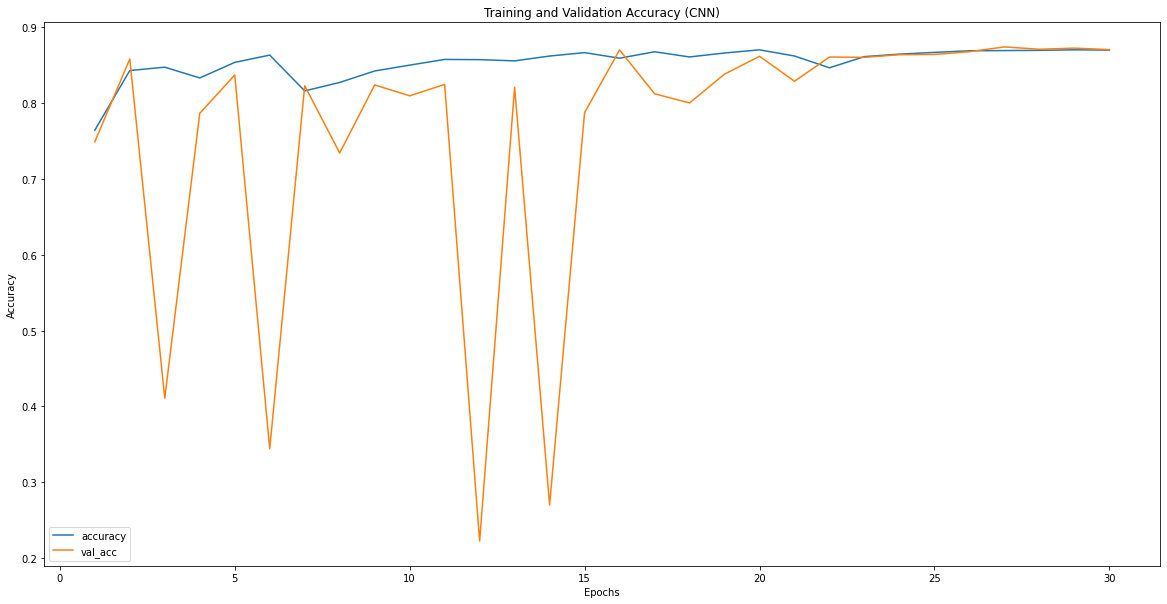

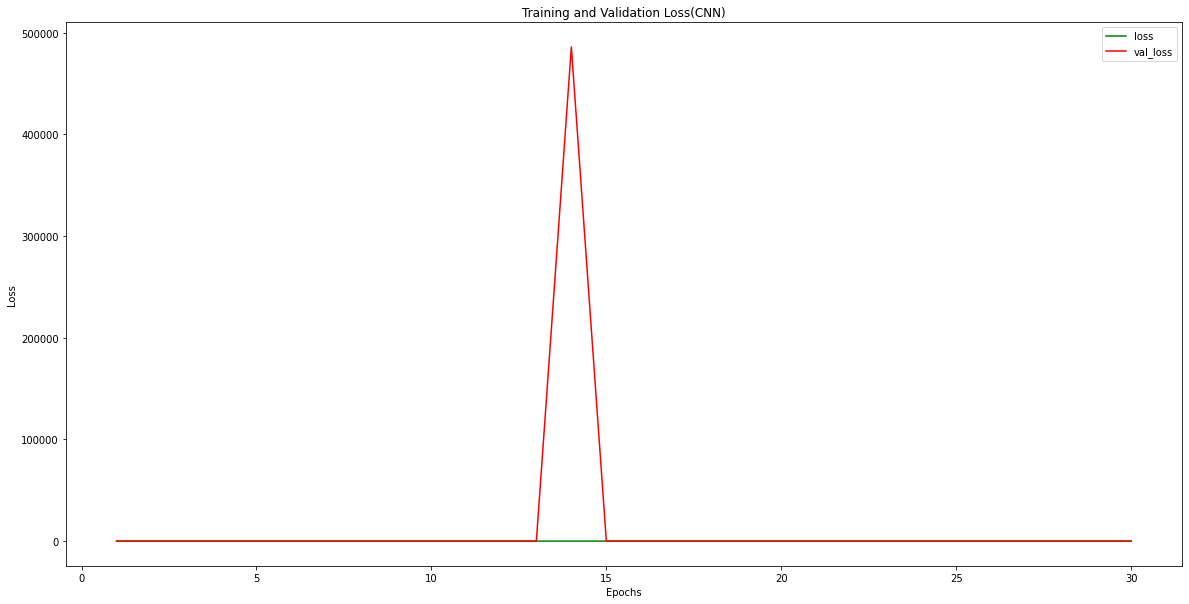

In [39]:
epochs = range(1, len(history['loss']) + 1)
acc = history['accuracy']
loss = history['loss']
val_acc = history['val_accuracy']
val_loss = history['val_loss']

# visualize training and val accuracy
plt.figure(figsize=(20, 10))
plt.title('Training and Validation Accuracy (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_acc')
plt.legend()

# visualize train and val loss
plt.figure(figsize=(20, 10))
plt.title('Training and Validation Loss(CNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='loss', color='g')
plt.plot(epochs, val_loss, label='val_loss', color='r')
plt.legend()